# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [3]:
from unityagents import UnityEnvironment
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
#env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')
env = UnityEnvironment(file_name='../../Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print('brain_name:', brain_name)
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

brain_name: ReacherBrain
Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### Train the DDPG agent

In [ ]:
def ddpg(env, brain_name, agent, n_episodes=1000, max_t=700):
    env_info = env.reset(train_mode=True)[brain_name]
    num_agents = len(env_info.agents)
    scores_deque = deque(maxlen=1000)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        states = env_info.vector_observations                  # get the current state (for each agent)
        #print('states', states)
        agent.reset()
        episode_scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        for t in range(max_t):
            actions = agent.act(states)
           # print('actions', actions)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            episode_scores += env_info.rewards                         # update the score (for each agent)
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break 
        scores_deque.append(episode_scores)
        scores.append(episode_scores)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), np.mean(episode_scores)), end="")
        if i_episode % 1000 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
    return scores

agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)
scores = ddpg(env, brain_name, agent, n_episodes=int(1e5))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 1000	Average Score: 0.48	Score: 0.00
Episode 2000	Average Score: 0.47	Score: 0.02
Episode 3000	Average Score: 0.44	Score: 0.00
Episode 3414	Average Score: 0.44	Score: 0.00

In [ ]:
from lib.environments import UnityEnv
from lib.ddpg_agent import DDPG_Agent
from lib.td3_agent import TD3_Agent


from .run_agent import train_agent

train_mode = True

env = UnityEnv('Reacher', '../../Reacher.app', train_mode=train_mode)
agent = agent_fn(name='DDPG_state',
                 state_size=env.state_size,
                 action_size=env.action_size,

train_agent(env, agent, max_steps=5)
                 

In [4]:
# Test Agent
from lib.model import Actor, Critic
from lib.ddpg_agent import Agent
from collections import deque

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))

agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))



while True:
    actions = agent.act(states, add_noise=False)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.5099999886006117


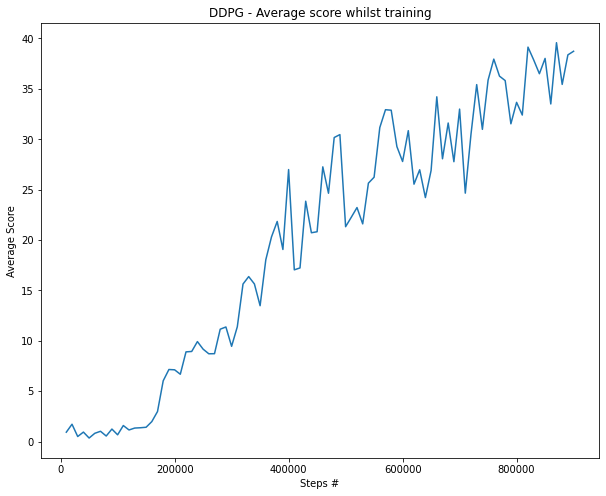

<Figure size 720x576 with 0 Axes>

In [4]:
import pandas as pd

df = pd.read_csv('Reacher_DDPG_UniformReplay.csv')

plt.rcParams["figure.figsize"] = (10,8)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('DDPG - Average score whilst training')
plt.plot(df['steps'], df['average_score'])
plt.ylabel('Average Score')
plt.xlabel('Steps #')
plt.show()
plt.savefig('ddpg_learning_rate')

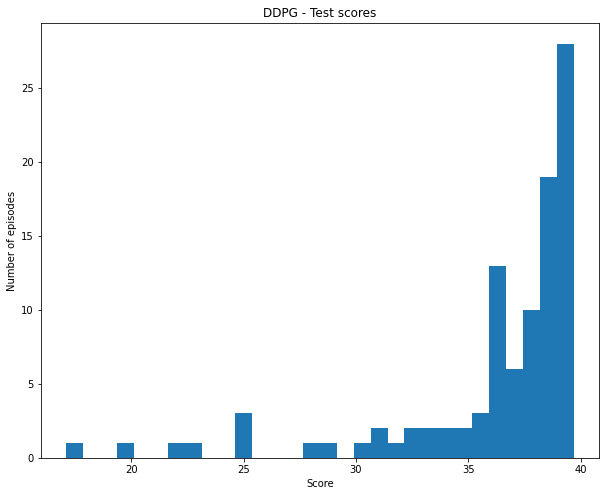

<Figure size 720x576 with 0 Axes>

In [16]:
# Test agent 
df = pd.read_csv('Reacher_DDPG_UniformReplay-evaluate.csv')

plt.rcParams["figure.figsize"] = (10,8)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('DDPG - Test scores')
n, bins, patches = plt.hist(df['score'], 30)
plt.ylabel('Number of episodes')
plt.xlabel('Score')
plt.show()
plt.savefig('ddpg_test_scores')

In [9]:
df.min()

Unnamed: 0     0.0
time          80.0
score         17.1
dtype: float64

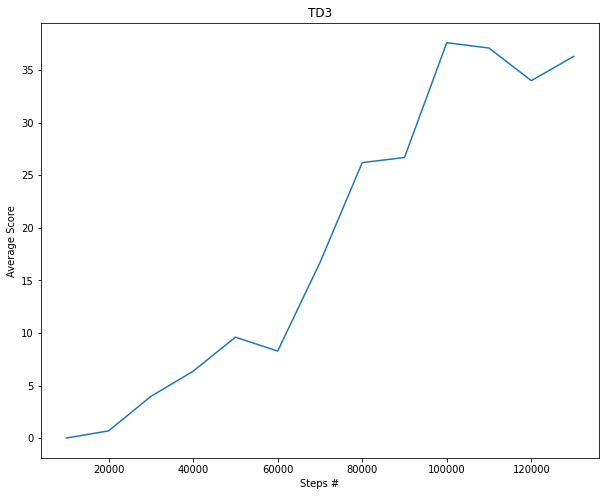

<Figure size 720x576 with 0 Axes>

In [16]:
df = pd.read_csv('Reacher_TD3_UniformReplay.csv')


fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('TD3 - Average score whilst training')
plt.plot(df['steps'], df['average_score'])
plt.ylabel('Average Score')
plt.xlabel('Steps #')
plt.show()

plt.savefig('td3_learning_rate')

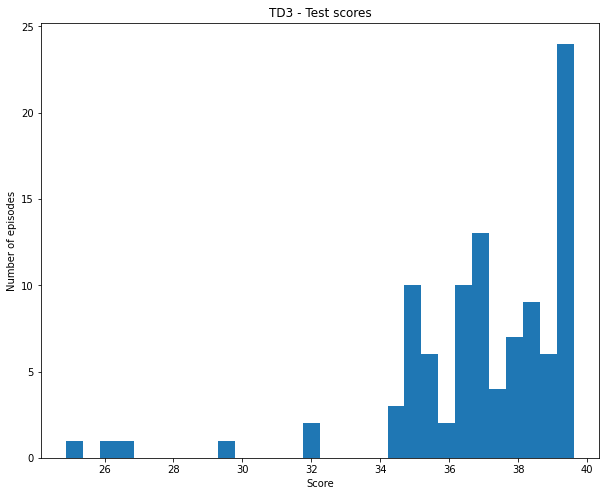

<Figure size 720x576 with 0 Axes>

In [17]:
# Test agent 
df = pd.read_csv('Reacher_TD3_UniformReplay-evaluate.csv')

plt.rcParams["figure.figsize"] = (10,8)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('TD3 - Test scores')
n, bins, patches = plt.hist(df['score'], 30)
plt.ylabel('Number of episodes')
plt.xlabel('Score')
plt.show()
plt.savefig('td3_test_scores')